# Train baseline clinical transformer Model for Survival
This is the training of the clinical transformer withoug using pre-trained weights from the self uspervised model.

In [1]:

import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
tf.test.is_gpu_available()
tf.__version__

tf.config.run_functions_eagerly(True)

import sys
sys.path.append('../codeocean/environment/clinical_transformer/')

2025-08-12 18:34:11.529433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-12 18:34:11.585523: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-12 18:34:11.935486: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-12 18:34:11.935520: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-12 18:34:12.345262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-12 18:34:12.355771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-12 18:34:12.371944: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-12 18:34:12.372037: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-29:].tolist()

In [5]:
features

['Angiogenesis',
 'Antitumor cytokines',
 'B cells',
 'Cancer-associated fibroblasts',
 'Checkpoint molecules',
 'Co-stimulatory ligands',
 'Co-stimulatory receptors',
 'Effector cell traffic',
 'Effector cells',
 'Endothelium',
 'Granulocyte traffic',
 'Immune Suppression by Myeloid Cells',
 'M1 signature',
 'MHCI',
 'MHCII',
 'Macrophage and DC traffic',
 'Matrix',
 'Matrix remodeling',
 'Myeloid cells traffic',
 'NK cells',
 'Neutrophil signature',
 'Protumor cytokines',
 'T cells',
 'Th1 signature',
 'Th2 signature',
 'Treg',
 'Treg and Th2 traffic',
 'Tumor proliferation rate',
 'Tumor-associated Macrophages']

## Parameters

In [6]:
max_features_percentile=100
test_size=0.3 # fraction of samples used for testing
repetitions=1 # number replicates (training / testing) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=100
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 2

## Training

In [12]:
!rm -r ./results/runs/Survival/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)


In [13]:
outdir = './results/runs/Survival/'
set_seed(0)

trainer = Trainer(
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

INFO	2025-08-12 18:34:31,873	Setting up working directory: ./results/runs/Survival/
INFO	2025-08-12 18:34:31,877	Number of continuous features: 29
INFO	2025-08-12 18:34:31,878	Number of discrete features: 0
INFO	2025-08-12 18:34:31,880	Number of samples: 562
INFO	2025-08-12 18:34:31,891	Number of classes: 1
INFO	2025-08-12 18:34:31,891	RUN ID: fold-0_id-0
INFO	2025-08-12 18:34:31,892	RUN ID out directory: ./results/runs/Survival//fold-0_id-0/
INFO	2025-08-12 18:34:31,944	Training samples: 393
INFO	2025-08-12 18:34:31,944	Testing samples: 169
INFO	2025-08-12 18:34:31,947	Number of features at 100th percentile: 29 that are non nans
2025-08-12 18:34:31.948299: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-12 18:34:31.948450: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read fr

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2025-08-12 18:34:32.476537: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
WARNING	2025-08-12 18:34:32,641	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7fdcd031c3b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate th

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-12 18:34:32,743	AutoGraph could not transform <function sigmoid_concordance at 0x7fdc92ce2830> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 264ms/step - loss: 0.5020 - sigmoid_concordance: 0.4927 - val_loss: 0.4982 - val_sigmoid_concordance: 0.5177
Epoch 2/100
1/1 [==============================] - 0s 121ms/step - loss: 0.5082 - sigmoid_concordance: 0.4844 - val_loss: 0.4963 - val_sigmoid_concordance: 0.5237
Epoch 3/100
1/1 [==============================] - 0s 139ms/step - loss: 0.5032 - sigmoid_concordance: 0.4994 - val_loss: 0.4947 - val_sigmoid_concordance: 0.5264
Epoch 4/100
1/1 [==============================] - 0s 126ms/step - loss: 0.4865 - sigmoid_concordance: 0.5226 - val_loss: 0.4930 - val_sigmoid_concordance: 0.5271
Epoch 5/100
1/1 [==============================] - 0s 125

Text(0, 0.5, 'Cindex loss')

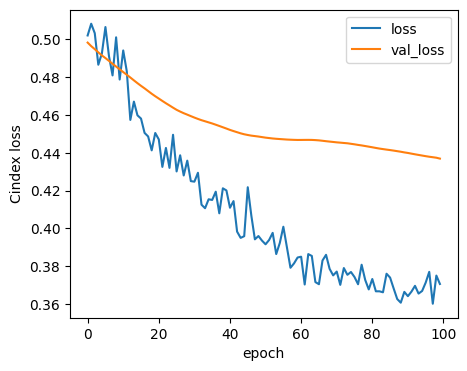

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dfh = pd.read_csv("./results/runs/Survival///fold-0_id-0/history.csv", index_col=0)
fig, ax=plt.subplots(figsize=(5,4))
dfh[['loss', 'val_loss']].plot(ax=ax)
ax.set_ylabel('Cindex loss')